# Sesion 17 - Actividad: Puntaje Reading

## Actividad Básica: Puntaje Reading

* Crea / Presenta la forma que creas más conveniente para describir cuántos alumnos por escuela tuvieron el mejor puntaje en "reading", y con ello saber que género es el que predomina en este filtro.
* Crea / Presenta la forma que creas más conveniente para describir cuántos alumnos por escuela tuvieron el peor puntaje en "reading", y con ello saber que género es el que predomina en este filtro.
 

## Actividad Avanzada: Puntaje Reading

* Crea / Presenta la forma que creas más conveniente para describir cuántos alumnos por escuela tuvieron el mejor puntaje en "reading", y con ello saber que género es el que predomina en este filtro.
* Crea / Presenta la forma que creas más conveniente para describir cuántos alumnos por escuela tuvieron el peor puntaje en "reading", y con ello saber que genero es el que predomina en este filtro.
* Para los alumnos con peor puntaje en reading, evalúa la relación que tiene su puntaje en matemáticas y obtén el coeficiente de correlación de Pearson para concluir si los datos se relacionan o no y grafica el resultado.

## <u> Carga de Librerias y Dataset </u>

In [1]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Carga dataset
data_students = pd.read_csv('clean_students_complete.csv')
data_students.head()

,Unnamed: 0,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,3,Richard Scott,M,12th,Huang High School,67,58
4,4,4,Bonnie Ray,F,9th,Huang High School,97,84


<p> ================================================================================================================= </p>

## <u>Preprocessing</u>

In [3]:
# Se coloca el student ID como indice
data_students.set_index('Student ID', inplace=True)
data_students.head()

,Unnamed: 0,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,,
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


In [4]:
# Se elimina la columna "Unnamed: 0"
data_students.drop('Unnamed: 0', inplace=True, axis=1)
data_students.head()

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
0,Paul Bradley,M,9th,Huang High School,66,79
1,Victor Smith,M,12th,Huang High School,94,61
2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,Richard Scott,M,12th,Huang High School,67,58
4,Bonnie Ray,F,9th,Huang High School,97,84


<p> ================================================================================================================= </p>

###  <u>Cuantos alumnos por escuela y genero tuvieron el mejor puntaje en reading</u>

In [26]:
# Se filtra a los alumnos con mejor puntaje en reading
data_students_reading = data_students[data_students['reading_score'] == data_students['reading_score'].max()]
data_students_reading

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
22,Kimberly Stewart,F,11th,Huang High School,99,84
35,Benjamin Carlson,M,10th,Huang High School,99,61
78,Jason Thompson,M,12th,Huang High School,99,57
90,Ronald Garcia,M,9th,Huang High School,99,86
98,Virginia Ramirez,F,10th,Huang High School,99,89
...,...,...,...,...,...,...
38990,Amber Reynolds,F,12th,Thomas High School,99,87
39033,Michael Everett,M,11th,Thomas High School,99,91
39114,Gregory Taylor,M,10th,Thomas High School,99,77


In [27]:
# Se crean los dummies para procesar el enero
data_students_reading_dummies = pd.get_dummies(data_students_reading['gender'])
data_students_reading_dummies

,F,M
Student ID,,
22,1,0
35,0,1
78,0,1
90,0,1
98,1,0
...,...,...
38990,1,0
39033,0,1
39114,0,1


In [28]:
# Se concatenan los dataframes
data_students_reading_concatenado = pd.concat([data_students_reading, data_students_reading_dummies], axis=1)
data_students_reading_concatenado.head()

,student_name,gender,grade,school_name,reading_score,math_score,F,M
Student ID,,,,,,,,
22,Kimberly Stewart,F,11th,Huang High School,99,84,1,0
35,Benjamin Carlson,M,10th,Huang High School,99,61,0,1
78,Jason Thompson,M,12th,Huang High School,99,57,0,1
90,Ronald Garcia,M,9th,Huang High School,99,86,0,1
98,Virginia Ramirez,F,10th,Huang High School,99,89,1,0


In [29]:
# Se agrupa por escuela
data_students_reading_agrupado = data_students_reading_concatenado.groupby('school_name').sum()
data_students_reading_agrupado

,reading_score,math_score,F,M
school_name,,,,
Bailey High School,11286,8717,58,56
Cabrera High School,5742,4855,27,31
Figueroa High School,9801,7567,50,49
Ford High School,5841,4521,35,24
Griffin High School,5148,4335,22,30
Hernandez High School,12276,9580,64,60
Holden High School,1188,1004,7,5
Huang High School,7425,5672,35,40
Johnson High School,11286,8656,63,51


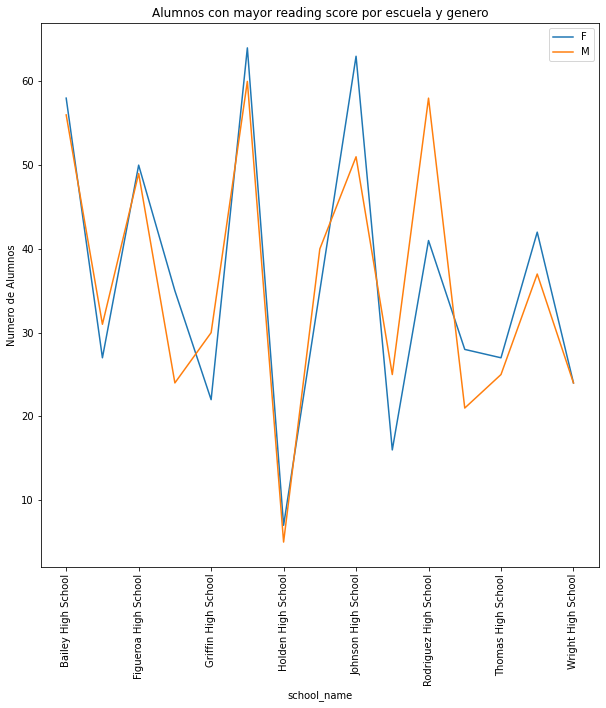

In [38]:
# Se grafican los datos
data_students_reading_agrupado[['F', 'M']].plot(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.title('Alumnos con mayor reading score por escuela y genero')
plt.ylabel('Numero de Alumnos');

## <u>Conclusion</u>
En la mayoria de las escuelas el numero de alumnos con genero Femenino es mayoy

<p> ================================================================================================================= </p>

## <u> Cuantos alumnos por escuela y genero tuvieron el peor puntaje en reading </u>

In [39]:
# Se filtra a los alumnos con peor puntaje en reading
data_students_low_reading = data_students[data_students['reading_score'] == data_students['reading_score'].min()]
data_students_low_reading.head()

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
26,Melanie Decker,F,9th,Huang High School,63,85
37,Jesse Newton,M,10th,Huang High School,63,66
60,Jared Wood,M,9th,Huang High School,63,89
124,Bonnie Mckinney,F,11th,Huang High School,63,65
131,Thomas Strickland,M,9th,Huang High School,63,77


In [40]:
# Se crean los dummies
data_students_low_reading_dummies = pd.get_dummies(data_students_low_reading['gender'])
data_students_low_reading_dummies.head()

,F,M
Student ID,,
26,1,0
37,0,1
60,0,1
124,1,0
131,0,1


In [41]:
# Se concatenan los dataframes
data_students_low_reading_concatenado = pd.concat([data_students_low_reading,data_students_low_reading_dummies],axis=1)
data_students_low_reading_concatenado.head()

,student_name,gender,grade,school_name,reading_score,math_score,F,M
Student ID,,,,,,,,
26,Melanie Decker,F,9th,Huang High School,63,85,1,0
37,Jesse Newton,M,10th,Huang High School,63,66,0,1
60,Jared Wood,M,9th,Huang High School,63,89,0,1
124,Bonnie Mckinney,F,11th,Huang High School,63,65,1,0
131,Thomas Strickland,M,9th,Huang High School,63,77,0,1


In [42]:
data_students_low_reading_agrupado = data_students_low_reading_concatenado.groupby('school_name').sum()
data_students_low_reading_agrupado.head()

,reading_score,math_score,F,M
school_name,,,,
Bailey High School,8505,10386,64,71
Figueroa High School,4914,6043,36,42
Ford High School,5355,6436,42,43
Hernandez High School,8442,10069,64,70
Huang High School,5166,6419,42,40


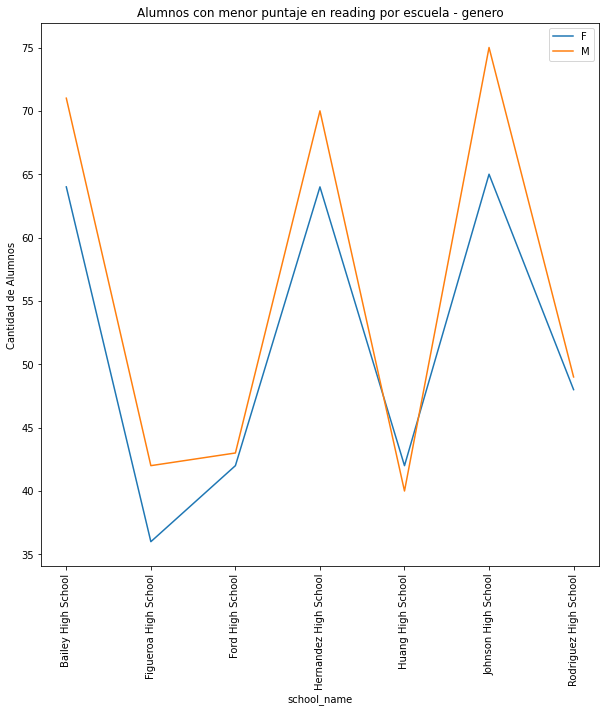

In [45]:
# Se grafica el dataframe
data_students_low_reading_agrupado[['F', 'M']].plot(figsize=(10,10))
plt.xticks(rotation=90)
plt.title('Alumnos con menor puntaje en reading por escuela - genero')
plt.ylabel('Cantidad de Alumnos');

## Conclusion
En la mayoria de las escuelas predomina el genero Masculino dentro de los alumnos con el puntaje mas bajo

<p> ================================================================================================================= </p>

## Para los alumnos con peor puntaje en reading, evalúa la relación que tiene su puntaje en matemáticas y obtén el coeficiente de correlación de Pearson para concluir si los datos se relacionan o no y grafica el resultado

In [47]:
# Informacion del Dataset
data_students_low_reading.head()

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
26,Melanie Decker,F,9th,Huang High School,63,85
37,Jesse Newton,M,10th,Huang High School,63,66
60,Jared Wood,M,9th,Huang High School,63,89
124,Bonnie Mckinney,F,11th,Huang High School,63,65
131,Thomas Strickland,M,9th,Huang High School,63,77


In [54]:
# Se revisa si hay nulos en las columnas de score
data_students_low_reading.isnull().sum()

student_name     0
gender           0
grade            0
school_name      0
reading_score    0
math_score       0
dtype: int64

In [50]:
# Se calcula la correlacion
correlacion = data_students_low_reading.corr()
correlacion

,reading_score,math_score
reading_score,NaN,NaN
math_score,NaN,1.0


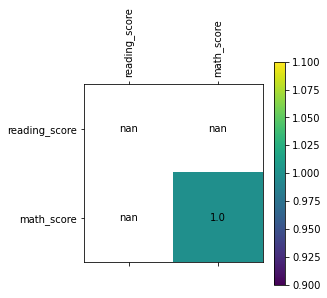

In [74]:
# Se grafica la correlacion

plt.matshow(correlacion)
plt.xticks(range(2), data_students_low_reading.columns[4:6], rotation=90)
plt.yticks(range(2), data_students_low_reading.columns[4:6])

for i in range(len(correlacion.columns)):
    for j in range(len(correlacion.columns)):
        plt.text(i, j, correlacion.iloc[i,j], ha='center', va='center')

plt.colorbar()

# Conclusion
No existe correlacion entre los scores de Math y Reading